<a href="https://colab.research.google.com/github/AlexFraisl/Crop-Disease-Model-HSLU/blob/main/Crop_Notebook2_Brownspot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import cv2


# GitHub repository URL
github_repo_url = "https://github.com/AlexFraisl/Crop-Disease-Model-HSLU.git"
local_data_dir = "/content/image_data_Brownspot2"

# Clone the repository
!git clone {github_repo_url} {local_data_dir}

# Define training and validation paths after cloning
training_folder = os.path.join(local_data_dir, "Dataset/archive/Train/Brownspot")
validation_folder = os.path.join(local_data_dir, "Dataset/archive/Validation/Brownspot")

def analyze_image_dataset(folder_path):
    image_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add other image extensions if needed
            filepath = os.path.join(folder_path, filename)
            try:
                image = Image.open(filepath)
                width, height = image.size
                image_data.append({
                    "filename": filename,
                    "width": width,
                    "height": height,
                    "format": image.format
                })
            except IOError:
                print(f"Error opening {filename}")

    return pd.DataFrame(image_data)

# Check if training and validation folders exist
if os.path.exists(training_folder):
    # Analyze the training set
    training_df = analyze_image_dataset(training_folder)
    print("Training Set Analysis:")
    print(training_df.describe())
    print(training_df.info())
else:
    print("Training folder not found!")

if os.path.exists(validation_folder):
    # Analyze the validation set
    validation_df = analyze_image_dataset(validation_folder)
    print("\nValidation Set Analysis:")
    print(validation_df.describe())
    print(validation_df.info())
else:
    print("Validation folder not found!")


Cloning into '/content/image_data_Brownspot2'...
remote: Enumerating objects: 15323, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15323 (delta 2), reused 7 (delta 0), pack-reused 15310 (from 1)
Receiving objects: 100% (15323/15323), 1.94 GiB | 33.13 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Updating files: 100% (18629/18629), done.
Training Set Analysis:
             width       height
count  1623.000000  1623.000000
mean    311.567468   300.873691
std     151.205759    36.280411
min     286.000000    88.000000
25%     300.000000   300.000000
50%     300.000000   300.000000
75%     300.000000   300.000000
max    3081.000000   900.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1623 non-null   object
 1   width     1623 non-null   int64 
 2   height    162

In [53]:
    print("Training Set Analysis:")
    print(training_df.describe())
    print(training_df.info())

Training Set Analysis:
             width       height  brown_spots
count  1623.000000  1623.000000  1623.000000
mean    311.567468   300.873691     2.035120
std     151.205759    36.280411     4.366742
min     286.000000    88.000000     0.000000
25%     300.000000   300.000000     0.000000
50%     300.000000   300.000000     1.000000
75%     300.000000   300.000000     2.000000
max    3081.000000   900.000000    72.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     1623 non-null   object
 1   width        1623 non-null   int64 
 2   height       1623 non-null   int64 
 3   format       1623 non-null   object
 4   brown_spots  1623 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 63.5+ KB
None


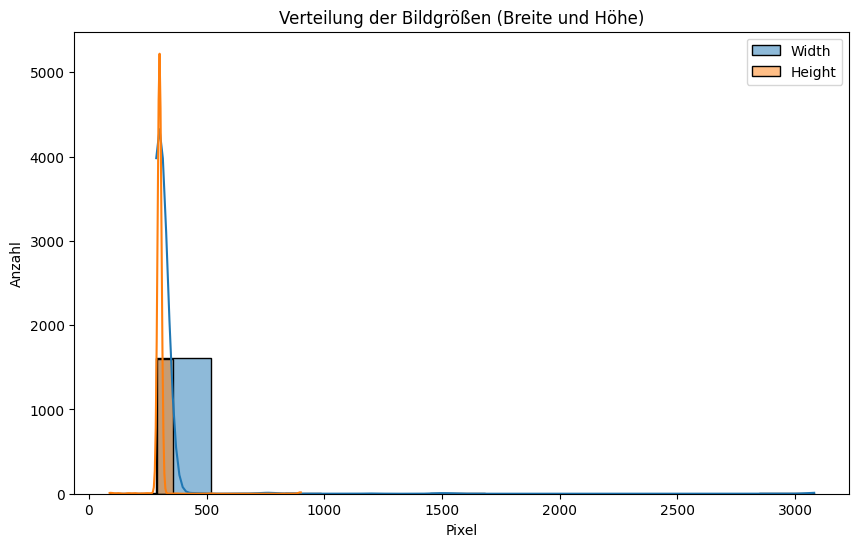

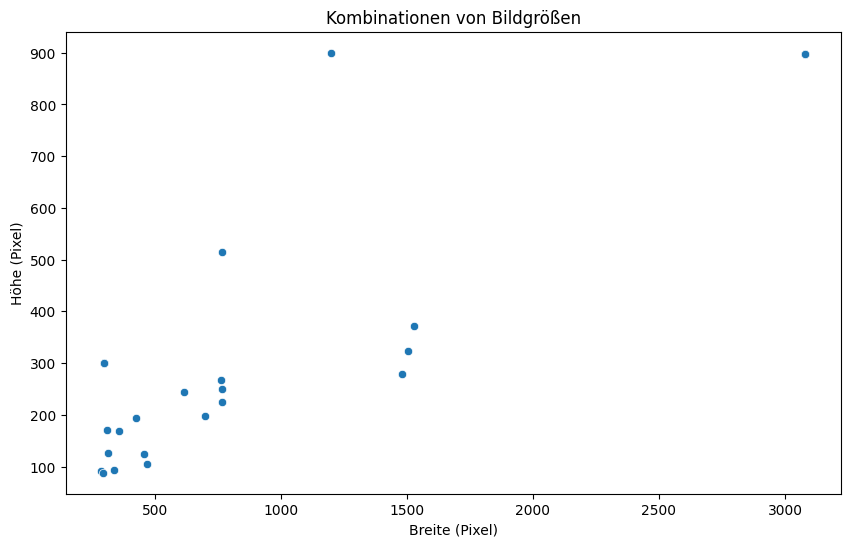


Frequenz der eindeutigen Bildgrößen:
    width  height  count
0     286      92      1
1     296      88      1
2     300     300   1600
3     311     170      1
4     316     127      1
5     340      94      1
6     359     168      1
7     427     193      1
8     456     124      1
9     467     104      1
10    617     244      1
11    699     197      1
12    763     268      1
13    765     224      1
14    766     250      1
15    768     514      1
16   1200     900      1
17   1480     279      1
18   1504     323      1
19   1530     371      1
20   3081     897      4


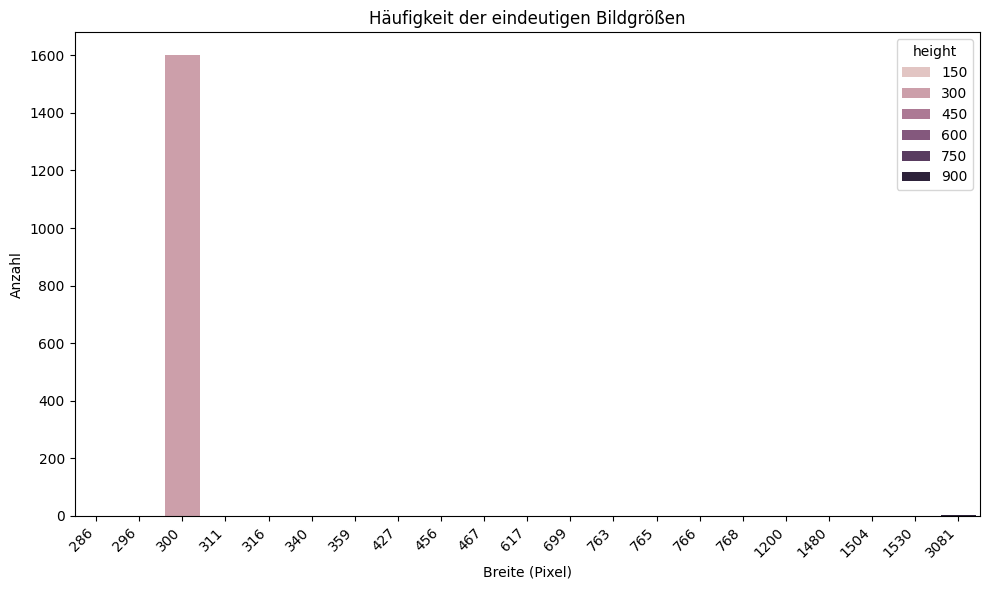

In [54]:
# prompt: visualisiere das trainings set. Um herauszufinden welche images größe wie oft vorhanden ist

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming training_df is already created from the previous code

# Visualize image sizes
plt.figure(figsize=(10, 6))
sns.histplot(training_df['width'], kde=True, label='Width')
sns.histplot(training_df['height'], kde=True, label='Height')
plt.xlabel('Pixel')
plt.ylabel('Anzahl')
plt.title('Verteilung der Bildgrößen (Breite und Höhe)')
plt.legend()
plt.show()


# Visualize image size combinations as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='width', y='height', data=training_df)
plt.xlabel('Breite (Pixel)')
plt.ylabel('Höhe (Pixel)')
plt.title('Kombinationen von Bildgrößen')
plt.show()

# Frequency of unique image sizes
size_counts = training_df.groupby(['width', 'height']).size().reset_index(name='count')
print("\nFrequenz der eindeutigen Bildgrößen:")
print(size_counts)

#Visualize the frequency of unique image sizes
plt.figure(figsize=(10, 6))
sns.barplot(x='width', y='count', hue='height', data=size_counts)
plt.xlabel('Breite (Pixel)')
plt.ylabel('Anzahl')
plt.title('Häufigkeit der eindeutigen Bildgrößen')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [45]:
# prompt: Liste eine Übersicht des training Datasets auf

# Assuming training_df is already created from the previous code

print("Training Set Overview:")
print(training_df.head()) # Display first few rows
print("\nSummary Statistics:")
print(training_df.describe()) # Summary statistics
print("\nData Types:")
print(training_df.info()) # Data types and non-null values
print("\nShape of the DataFrame:")
print(training_df.shape) # Number of rows and columns

Training Set Overview:
             filename  width  height format  brown_spots
0  BROWNSPOT7_003.jpg    300     300   JPEG            0
1  BROWNSPOT4_158.jpg    300     300   JPEG            2
2  BROWNSPOT7_043.jpg    300     300   JPEG            0
3  BROWNSPOT6_158.jpg    300     300   JPEG            2
4  BROWNSPOT1_053.jpg    300     300   JPEG            1

Summary Statistics:
             width       height  brown_spots
count  1623.000000  1623.000000  1623.000000
mean    311.567468   300.873691     2.035120
std     151.205759    36.280411     4.366742
min     286.000000    88.000000     0.000000
25%     300.000000   300.000000     0.000000
50%     300.000000   300.000000     1.000000
75%     300.000000   300.000000     2.000000
max    3081.000000   900.000000    72.000000

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fil

In [58]:
# prompt: zeige mir die unterschiedlichen Dateitypen des training data an

# ... (Your existing code)

# Assuming training_df is already created from the previous code

# Display unique image formats and their counts
format_counts = training_df['format'].value_counts()
print("\nUnique Image Formats and their Counts:")
format_counts


Unique Image Formats and their Counts:


,count
format,
JPEG,1559
PNG,64


In [43]:
# prompt: what is the average image size of the training data set

# Calculate the average image width and height
average_width = training_df['width'].mean()
average_height = training_df['height'].mean()

print(f"\nAverage Image Width: {average_width:.2f} pixels")
print(f"Average Image Height: {average_height:.2f} pixels")


Average Image Width: 311.57 pixels
Average Image Height: 300.87 pixels


In [47]:
# prompt: liste die anzahl aller images auf vom training dataset die nicht 300x300

# Count images in the training dataset that are not 300x300
non_300x300_count = len(training_df[(training_df['width'] != 300) | (training_df['height'] != 300)])
print(f"\nNumber of images in the training dataset that are not 300x300: {non_300x300_count}")


Number of images in the training dataset that are not 300x300: 23


In [57]:
# prompt: liste die anzahl aller images auf vom training dataset die 300x300

# Count images in the training dataset that are 300x300
count_300x300 = len(training_df[(training_df['width'] == 300) & (training_df['height'] == 300)])
print(f"\nNumber of images in the training dataset that are 300x300: {count_300x300}")


Number of images in the training dataset that are 300x300: 1600


Error processing image /content/image_data_Brownspot2/Dataset/archive/Train/Brownspot/BROWNSPOT7_002.jpg: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Error processing image /content/image_data_Brownspot2/Dataset/archive/Train/Brownspot/BROWNSPOT1_104.jpg: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Error processing image /content/image_data_Brownspot2/Dataset/archive/Train/Brownspot/BROWNSPOT7_102.jpg: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Error processing image /content/image_data_Brownspot2/Dataset/archive/Train/Brownspot/BROWNSPOT3_004.jpg: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Error processing image /content/image_data_Brownspot2/Da

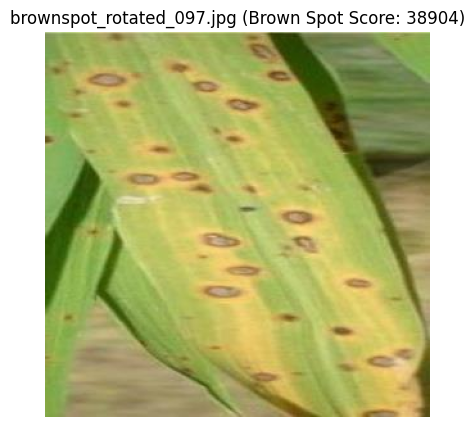

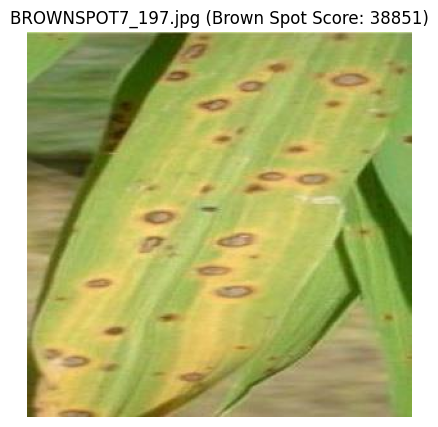

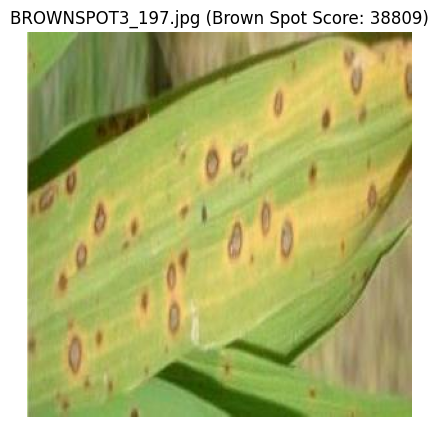

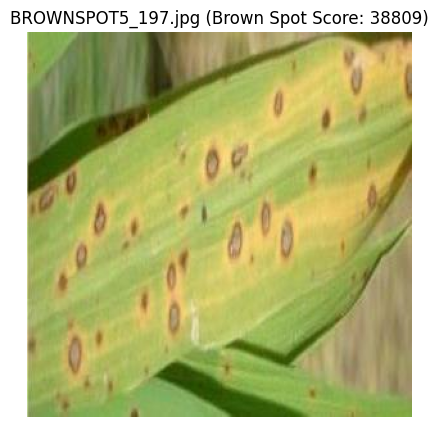

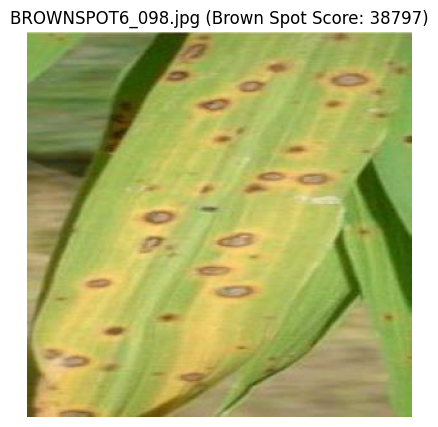

In [56]:
# prompt: Kannst du die top 5 bilder anzeigen von count_300x300 mit den meisten brown spots?

import pandas as pd
import os
from PIL import Image
import numpy as np
# ... (rest of your imports and existing code)

# Placeholder for brown spot detection (replace with actual implementation)
def detect_brown_spots(image_path):
    """
    Detects brown spots in an image and returns a score representing the number or intensity of spots.

    Args:
        image_path: Path to the image file.

    Returns:
        A numerical score representing the number or intensity of brown spots.
        Returns 0 if an error occurs during processing.
    """
    try:
        # Load the image using OpenCV
        img = cv2.imread(image_path)
        # Convert to HSV color space
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Define brown color range in HSV (adjust these values as needed)
        lower_brown = np.array([10, 50, 50])  # Lower bound for brown color in HSV
        upper_brown = np.array([30, 255, 255]) # Upper bound for brown color in HSV

        # Threshold the HSV image to get only brown colors
        mask = cv2.inRange(hsv, lower_brown, upper_brown)

        # Calculate the number of brown pixels
        brown_pixels = cv2.countNonZero(mask)

        # Return the number of brown pixels as the brown spot score
        return brown_pixels

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return 0  # Return 0 in case of errors


# Assuming training_df is already created and contains the 'filename' column
if 'filename' in training_df.columns:
    training_df['brown_spot_score'] = training_df['filename'].apply(lambda x: detect_brown_spots(os.path.join(training_folder, x)))


    # Filter for 300x300 images
    count_300x300_df = training_df[(training_df['width'] == 300) & (training_df['height'] == 300)]

    # Sort by brown spot score in descending order and get the top 5
    top_5_images = count_300x300_df.sort_values('brown_spot_score', ascending=False).head(5)


    print("\nTop 5 images (300x300) with most brown spots:")
    print(top_5_images[['filename', 'brown_spot_score']])

    # Display the top 5 images
    for index, row in top_5_images.iterrows():
      image_path = os.path.join(training_folder, row["filename"])
      try:
          img = cv2.imread(image_path)
          plt.figure(figsize=(5,5))
          plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
          plt.title(f"{row['filename']} (Brown Spot Score: {row['brown_spot_score']})")
          plt.axis('off')
          plt.show()
      except Exception as e:
          print(f"Error displaying image {row['filename']}: {e}")

else:
    print("Error: 'filename' column not found in training_df")


Analysis of Brown Spot Scores:
count     1623.000000
mean      2989.165126
std       6274.051596
min          0.000000
25%        643.500000
50%       1214.000000
75%       2531.000000
max      89789.000000
Name: brown_spot_score, dtype: float64


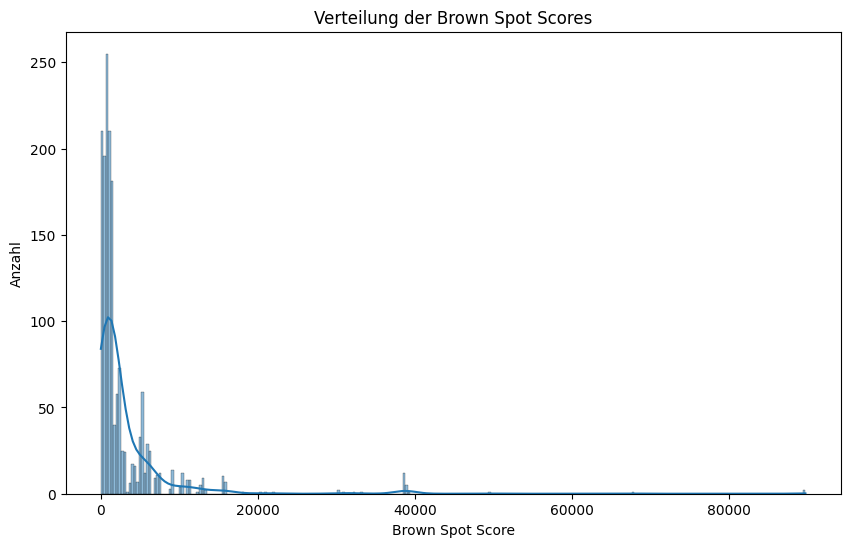


Images with the highest brown spot score (89789):
         filename  brown_spot_score
157  DSC_0110.jpg             89789

Images with the lowest brown spot score (0):
                       filename  brown_spot_score
56           BROWNSPOT7_002.jpg                 0
87           BROWNSPOT1_104.jpg                 0
97           BROWNSPOT7_102.jpg                 0
146          BROWNSPOT3_004.jpg                 0
176          BROWNSPOT6_004.jpg                 0
215   brownspot_rotated_006.jpg                 0
239          BROWNSPOT3_104.jpg                 0
249          BROWNSPOT3_006.jpg                 0
345          BROWNSPOT2_102.jpg                 0
355          BROWNSPOT3_106.jpg                 0
386          BROWNSPOT4_106.jpg                 0
412   brownspot_rotated_002.jpg                 0
415          BROWNSPOT1_006.jpg                 0
454          BROWNSPOT7_106.jpg                 0
534          BROWNSPOT2_104.jpg                 0
557          BROWNSPOT5_006.jpg

In [59]:
# prompt: Gib mir bitte infos über die brown_spots

# Assuming training_df is already created and contains the 'filename' column and 'brown_spot_score'
if 'brown_spot_score' in training_df.columns:
    print("\nAnalysis of Brown Spot Scores:")
    print(training_df['brown_spot_score'].describe()) # Summary statistics for brown spot scores

    # Plotting the distribution of brown spot scores
    plt.figure(figsize=(10, 6))
    sns.histplot(training_df['brown_spot_score'], kde=True)
    plt.xlabel('Brown Spot Score')
    plt.ylabel('Anzahl')
    plt.title('Verteilung der Brown Spot Scores')
    plt.show()

    # Find images with the highest and lowest brown spot scores
    max_brown_spot = training_df['brown_spot_score'].max()
    min_brown_spot = training_df['brown_spot_score'].min()

    images_with_max_spots = training_df[training_df['brown_spot_score'] == max_brown_spot]
    images_with_min_spots = training_df[training_df['brown_spot_score'] == min_brown_spot]

    print(f"\nImages with the highest brown spot score ({max_brown_spot}):")
    print(images_with_max_spots[['filename', 'brown_spot_score']])

    print(f"\nImages with the lowest brown spot score ({min_brown_spot}):")
    print(images_with_min_spots[['filename', 'brown_spot_score']])
else:
    print("Error: 'brown_spot_score' column not found in training_df. Run the brown spot detection first.")

In [62]:
# prompt: Gib mir eine Liste der Kranken und gesunden blätter von count_300x300

# Assuming count_300x300 is defined from the previous code

# Filter the DataFrame for images with dimensions 300x300
count_300x300_df = training_df[(training_df['width'] == 300) & (training_df['height'] == 300)]

# Assuming 'brown_spot_score' column exists (calculated previously)
if 'brown_spot_score' in count_300x300_df.columns:
    # Sort by brown spot score to identify healthy and unhealthy leaves
    sorted_df = count_300x300_df.sort_values('brown_spot_score', ascending=False)

    # Define a threshold (you might need to adjust based on your data)
    threshold = sorted_df['brown_spot_score'].median()

    # Get healthy and unhealthy leaves based on the threshold
    healthy_leaves = sorted_df[sorted_df['brown_spot_score'] < threshold]
    unhealthy_leaves = sorted_df[sorted_df['brown_spot_score'] >= threshold]

    print("\nHealthy Leaves (300x300):")
    print(healthy_leaves[['filename', 'brown_spot_score']])

    print("\nUnhealthy Leaves (300x300):")
    print(unhealthy_leaves[['filename', 'brown_spot_score']])
else:
    print("Error: 'brown_spot_score' column not found in the DataFrame. Make sure you have run the brown spot detection code.")


Healthy Leaves (300x300):
                   filename  brown_spot_score
553  brownspot_orig_055.jpg              1203
283      BROWNSPOT5_153.jpg              1196
17       BROWNSPOT3_153.jpg              1196
226      BROWNSPOT2_100.jpg              1175
295      BROWNSPOT7_024.jpg              1173
..                      ...               ...
877  brownspot_orig_002.jpg                 0
557      BROWNSPOT5_006.jpg                 0
612      BROWNSPOT4_004.jpg                 0
249      BROWNSPOT3_006.jpg                 0
760  brownspot_orig_006.jpg                 0

[800 rows x 2 columns]

Unhealthy Leaves (300x300):
                       filename  brown_spot_score
502   brownspot_rotated_097.jpg             38904
689          BROWNSPOT7_197.jpg             38851
246          BROWNSPOT3_197.jpg             38809
396          BROWNSPOT5_197.jpg             38809
1030         BROWNSPOT6_098.jpg             38797
...                         ...               ...
1137         BROWN

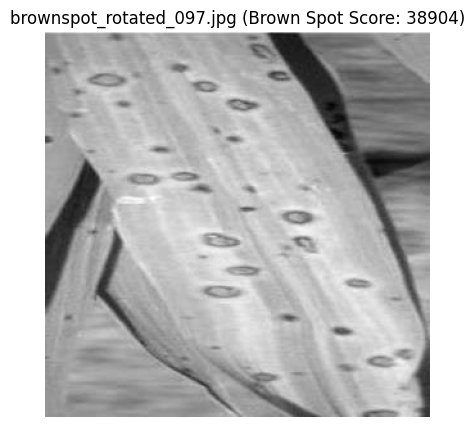

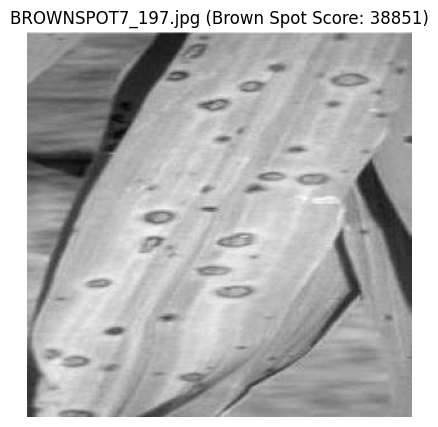

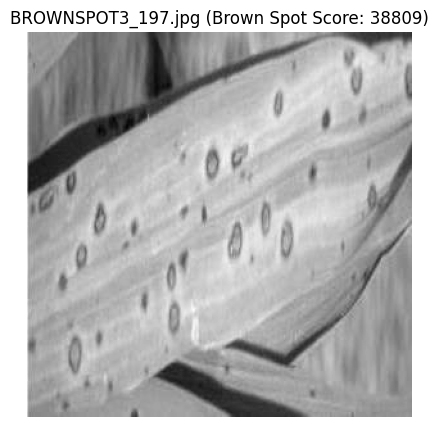

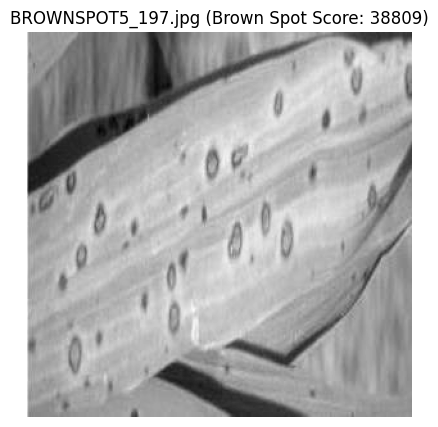

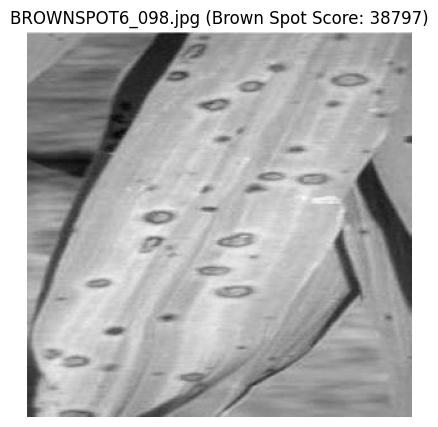

In [63]:
# prompt: Show us the top 5 images with the highest brown spot score in grey tone

# Assuming top_5_images DataFrame is already created and contains 'filename' and 'brown_spot_score' columns

import matplotlib.pyplot as plt
import cv2

# Display the top 5 images in grayscale
for index, row in top_5_images.iterrows():
    image_path = os.path.join(training_folder, row["filename"])
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        plt.figure(figsize=(5, 5))
        plt.imshow(img, cmap='gray')  # Display grayscale image
        plt.title(f"{row['filename']} (Brown Spot Score: {row['brown_spot_score']})")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error displaying image {row['filename']}: {e}")